In [37]:
import sys
import seaborn
import pandas
import matplotlib
import numpy
import scipy
import sklearn
print("python: {}".format(sys.version))
print("Numpy: {}".format(numpy.__version__))
print("pandas: {}".format(pandas.__version__))
print("seaborn: {}".format(seaborn.__version__))
print("matplotlib: {}".format(matplotlib.__version__))
print("scipy: {}".format(scipy.__version__))
print("sklearn: {}".format(sklearn.__version__))

python: 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
Numpy: 1.14.3
pandas: 0.23.0
seaborn: 0.8.1
matplotlib: 2.2.2
scipy: 1.1.0
sklearn: 0.19.1


In [39]:
#import necessory packages.
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [40]:
data=pd.read_csv(r'C:\Users\vinay\Desktop\creditcard.csv')

In [41]:
data=data.sample(frac= 0.1,random_state=1)
print(data.shape)

(28481, 31)


In [42]:
from sklearn import cross_validation
X = data.values # end index is exclusive
y = data.Class.values # showing you two ways of indexing a pandas df
X.shape # We can see that there are 100000lakh reviews(rows)


(28481, 31)

In [43]:
data[100:110]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
195961,131299.0,1.710762,-1.642717,-1.971381,-1.172522,-0.907598,-1.602256,0.284013,-0.558546,-0.164402,...,-0.146282,-0.432219,-0.078258,0.080576,-0.138666,0.720547,-0.135697,-0.027172,280.81,0
43962,41721.0,-1.659741,0.354997,1.905338,-1.029705,-0.679250,0.663244,-0.245794,0.775662,0.335435,...,-0.096781,-0.283799,-0.349827,-0.223988,0.035980,0.869987,-0.278384,-0.158768,69.34,0
172672,121193.0,2.117014,-0.876500,-1.350676,-1.030894,-0.458667,-0.754510,-0.402439,-0.166631,-0.639526,...,-0.012090,-0.199514,0.217445,-0.498147,-0.236393,-0.418224,-0.045744,-0.066055,49.40,0
162061,114786.0,2.088202,-0.282201,-1.839330,-0.117541,0.492669,-0.079977,-0.132203,0.068639,0.910213,...,0.238241,0.693131,-0.069547,-0.249818,0.341092,-0.405357,-0.013741,-0.071451,1.00,0
89565,62628.0,-2.245474,1.945903,0.411740,-0.181944,-0.096932,0.214475,-0.993264,-3.648722,-0.150863,...,3.492469,-1.908264,0.768304,-0.131714,-0.000678,0.090883,0.119842,-0.241319,1.98,0
132393,79972.0,-0.455815,-0.206672,2.130434,-0.454155,-1.857334,0.650322,-0.306089,0.157228,-0.059669,...,0.359277,1.364004,-0.103755,0.483681,-0.483004,-0.006216,0.037234,0.121178,115.00,0
119212,75372.0,1.000789,-0.613113,0.432908,-0.106299,-0.528019,0.432414,-0.526194,0.220748,0.336083,...,0.267325,0.575382,-0.226958,-0.560120,0.211433,1.195075,-0.063107,0.010468,118.00,0
229215,145841.0,2.070285,-1.488056,-2.909197,-1.728482,0.097455,-0.774266,0.212828,-0.554986,-2.486503,...,0.243451,0.829648,-0.355969,0.284349,0.676479,0.259534,-0.107175,-0.064072,189.90,0
114351,73444.0,-8.891598,5.845888,-4.675332,1.208789,-5.029477,-1.340807,-4.591452,4.067048,-1.028677,...,1.715955,-0.188227,0.653398,0.683759,-0.292534,-0.780578,-5.406545,-1.180438,5.00,0
34656,37768.0,-1.351510,-0.526841,2.346504,0.905259,0.811334,-0.898309,0.055334,-0.027953,-0.079857,...,-0.058149,-0.236676,0.098179,0.629883,0.150609,0.371961,-0.167779,-0.130416,42.13,0


In [44]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [45]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count   28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean    94705.035216     -0.001143     -0.018290      0.000795      0.000350   
std     47584.727034      1.994661      1.709050      1.522313      1.420003   
min         0.000000    -40.470142    -63.344698    -31.813586     -5.266509   
25%     53924.000000     -0.908809     -0.610322     -0.892884     -0.847370   
50%     84551.000000      0.031139      0.051775      0.178943     -0.017692   
75%    139392.000000      1.320048      0.792685      1.035197      0.737312   
max    172784.000000      2.411499     17.418649      4.069865     16.715537   

                 V5            V6            V7            V8            V9  \
count  28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean      -0.015666      0.003634     -0.008523     -0.003040      0.014536   
std        1.395552      1.334985      1.2

In [46]:
data=data.sample(frac= 0.1,random_state=1)
print(data.shape)

(2848, 31)


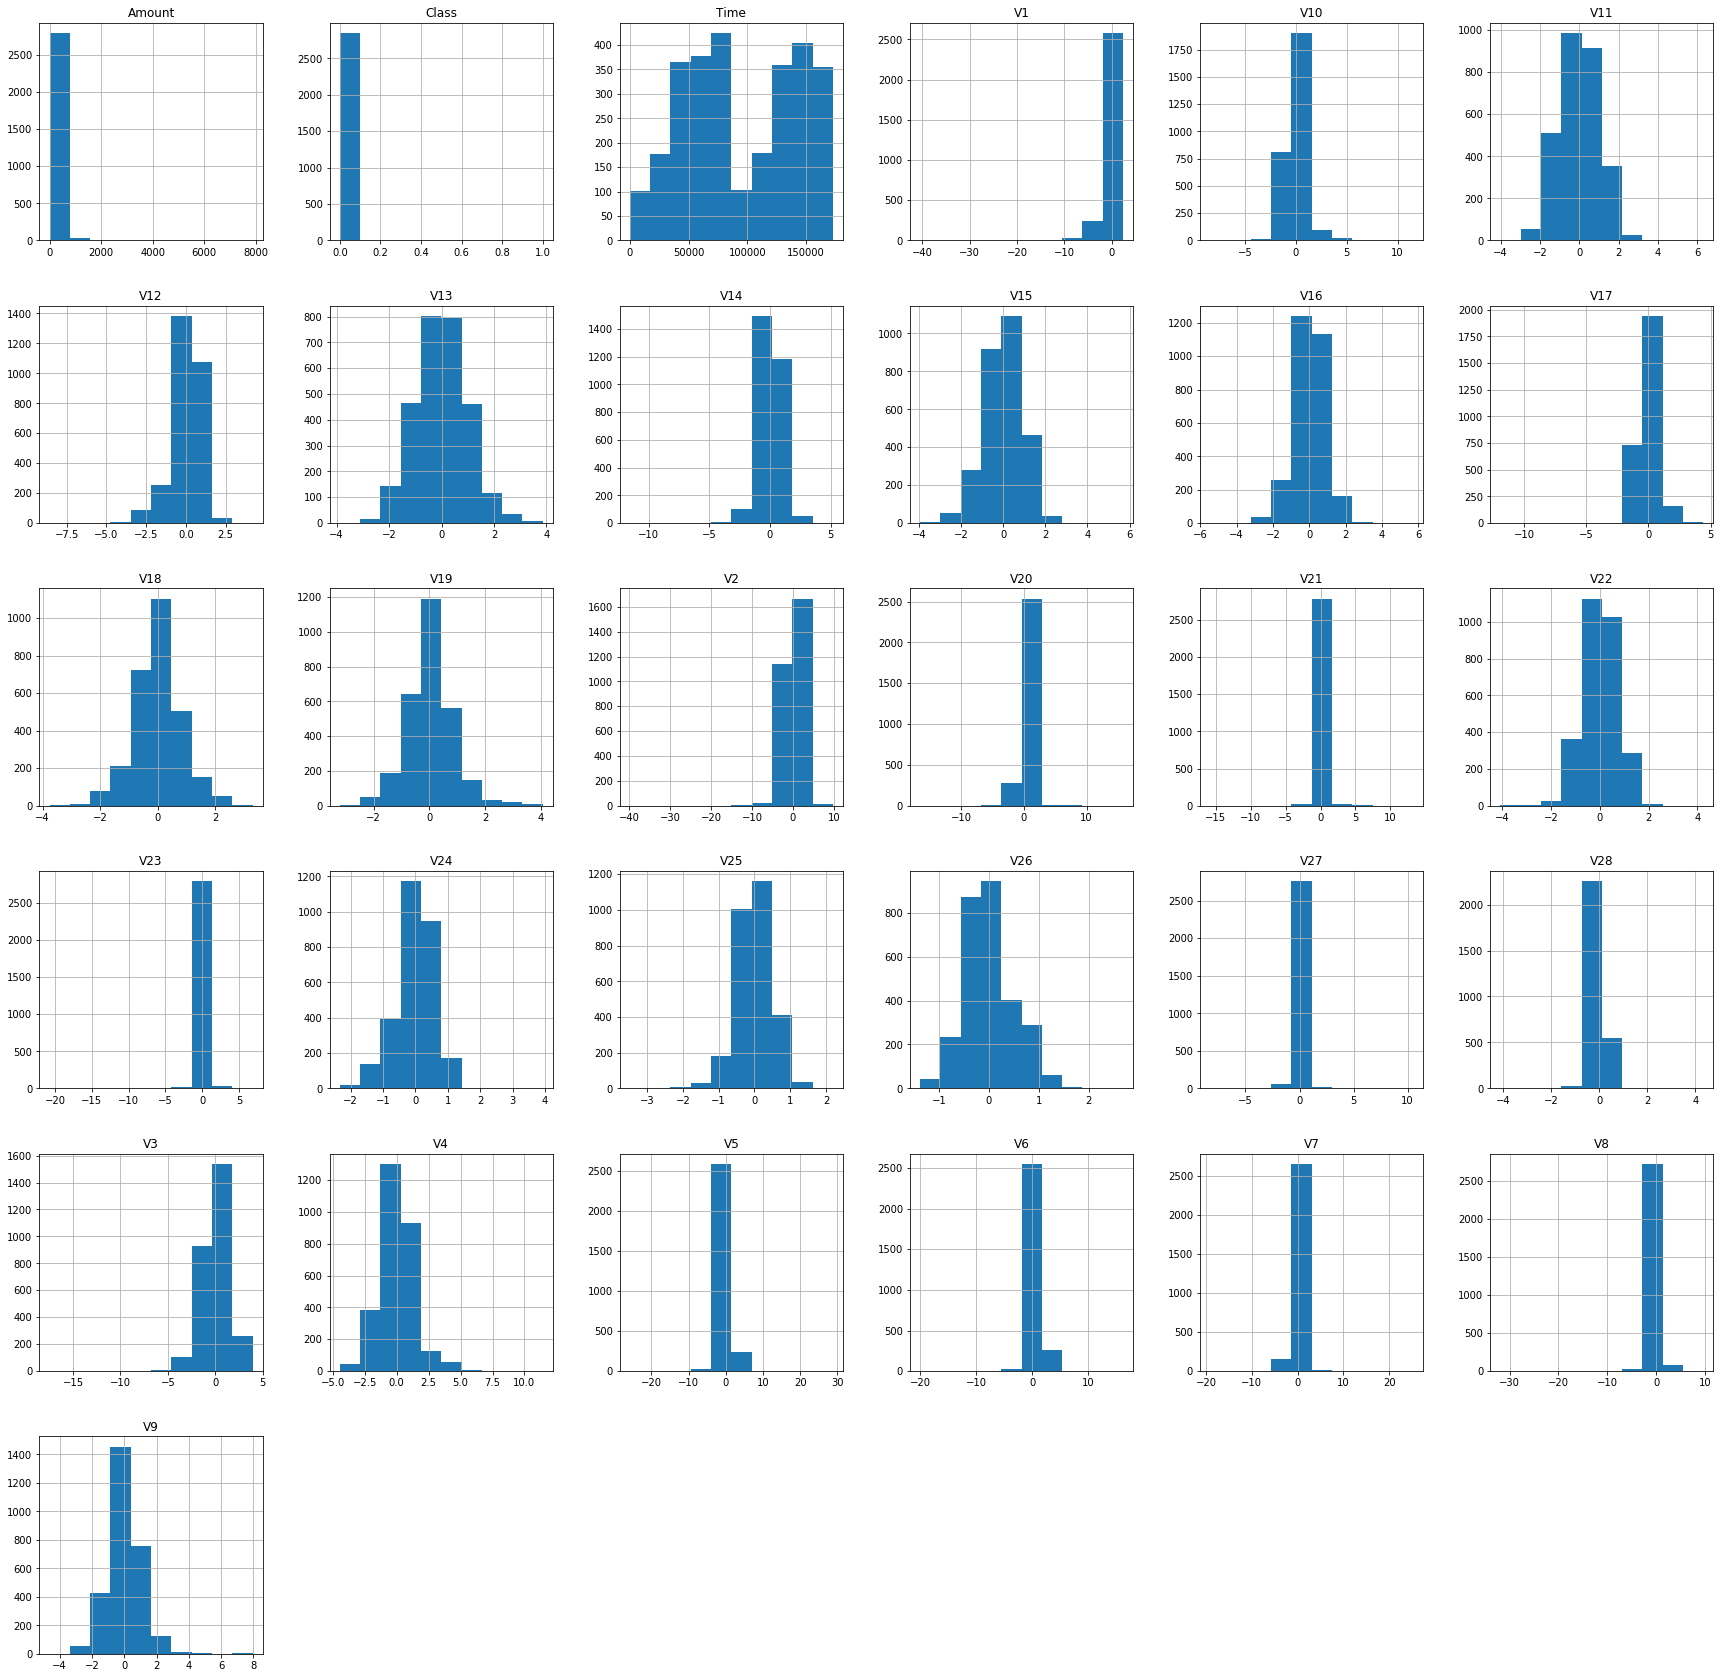

In [47]:
# plot histogram.
data.hist(figsize=(30,30))
plt.show()

In [48]:
fraud=data[data['Class']==1]
valid=data[data['Class']==0]

In [49]:
outlier_fraction=len(fraud)/float(len(valid))

In [50]:
print(outlier_fraction)

0.0017587055926837848


In [51]:
print('FraudCases:{}'.format(len(fraud)))
print('ValidCases:{}'.format(len(valid)))

FraudCases:5
ValidCases:2843


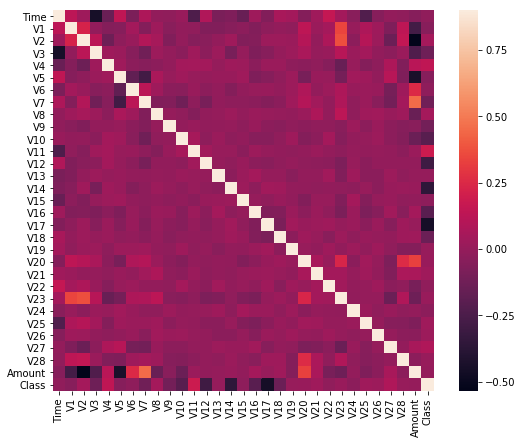

In [52]:
#Correlation Matrice
corrmat=data.corr()
fig=plt.figure(figsize=(9,7))
sns.heatmap(corrmat,vmax=0.9,square= True)
plt.show()

In [55]:
#get all the columns from the data frame.
columns=data.columns.tolist()
columns=[c for c in columns if c not in ["Class"]]
# store the value we will be predicting on
target="Class"
x=data[columns]
y=data[target]
print(x.shape)
print(y.shape) 

(2848, 30)
(2848,)


In [30]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

#define a random state

state = 1 
classifiers = { "Isolation Forest": IsolationForest(max_samples=len(x),
                                                    contamination=outlier_fraction,
                                                   random_state=state),
               "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20,
                                                         contamination=outlier_fraction)
}


In [33]:
# fit the model
n_outliers= len(fraud)

for i,(clf_name,clf)in enumerate(classifiers.items()):
    #fit the data and tag outliers.
    if clf_name =="Local Outlier Factor":
        y_pred=clf.fit_predict(x)
        scores_pred=clf.negative_outlier_factor_
    else:
        clf.fit(x)
        score_pred=clf.decision_function(x)
        y_pred=clf.predict(x)
        
        #reshape the prediction values to 0 for valid, 1 for fraud.
    y_pred[y_pred==1]= 0
    y_pred[y_pred== -1]= 1
    
    n_errors = (y_pred!=y).sum()
    
    #Run the classification metrics.
    print("{}:{}".format(clf_name,n_errors))
    print(accuracy_score(y,y_pred))
    print(classification_report(y,y_pred))
    

Isolation Forest:71
0.99750711000316
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.28      0.29      0.28        49

avg / total       1.00      1.00      1.00     28481

Local Outlier Factor:97
0.9965942207085425
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.02      0.02      0.02        49

avg / total       1.00      1.00      1.00     28481

